In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adult_data = pd.read_csv('./adult_data.csv')
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
print('The number of education categories is '+str(len(adult_data['education'].unique())))

The number of education categories is 16


In [17]:
print('The number of occurences for categoricals is:')
adult_data['education'].value_counts()

The number of occurences for categoricals is:


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [22]:
#Bin the 'age' column into 5 groups and count the value in each group.
print('The bin with the highest frequency is shown in:')
pd.cut(adult_data['age'],5).value_counts()

The bin with the highest frequency is shown in:


(31.6, 46.2]      12211
(16.927, 31.6]    11460
(46.2, 60.8]       6558
(60.8, 75.4]       2091
(75.4, 90.0]        241
Name: age, dtype: int64

In [36]:
adult_data.groupby(['salary'])['sex'].value_counts()

salary  sex    
<=50K    Male      15128
         Female     9592
>50K     Male       6662
         Female     1179
Name: sex, dtype: int64

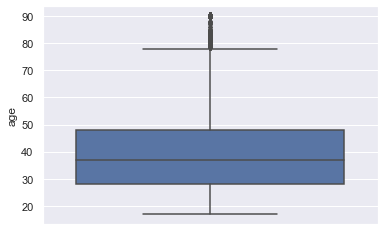

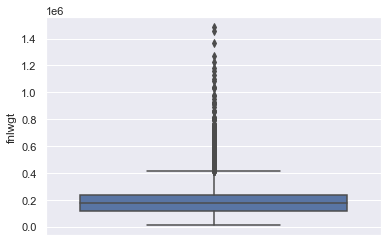

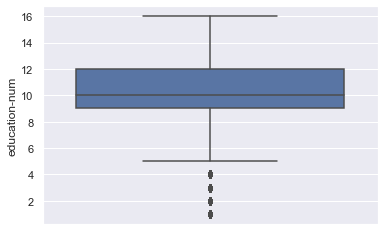

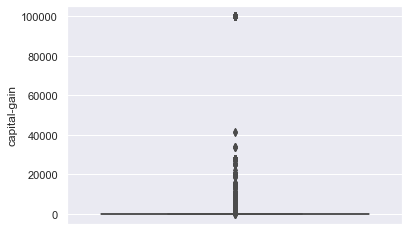

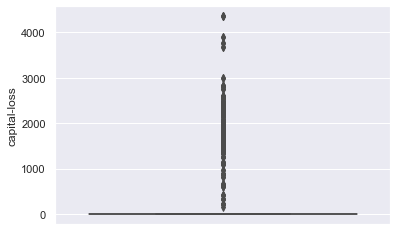

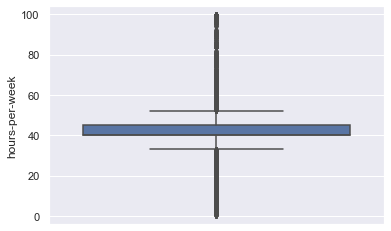

In [50]:
numeric_adult = adult_data.select_dtypes(include=np.number).columns.tolist()

for b in numeric_adult:
    sns.boxplot(y = adult_data[b])
    plt.show()

In [51]:
len(adult_data)-len(adult_data.drop_duplicates())

24

In [57]:
adult_data.groupby(['native-country'])['hours-per-week'].mean().idxmax()


' Thailand'

In [58]:
len(adult_data[adult_data['capital-loss']>0])

1519

In [60]:
adult_data.groupby(['occupation'])['hours-per-week'].mean().sort_values()

occupation
 ?                    31.906131
 Priv-house-serv      32.885906
 Other-service        34.701669
 Adm-clerical         37.558355
 Handlers-cleaners    37.947445
 Tech-support         39.432112
 Armed-Forces         40.666667
 Machine-op-inspct    40.755744
 Sales                40.781096
 Craft-repair         42.304221
 Prof-specialty       42.386715
 Protective-serv      42.870570
 Transport-moving     44.656230
 Exec-managerial      44.987703
 Farming-fishing      46.989940
Name: hours-per-week, dtype: float64